# Exploration des données de tweets

**Auteur :** Mehdi MUNIM

**Date :** 2023-11-26

**Description :**

Ce notebook explore les données de tweets afin de mieux comprendre leurs caractéristiques et de préparer les étapes de prétraitement et de modélisation.

In [14]:
#@title 1. Importation des librairies

# Librairies pour la manipulation et l'analyse des données
import pandas as pd
import numpy as np

# Librairies pour le traitement du langage naturel (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Librairies pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Librairies pour la sauvegarde des données
import os
import pickle

# Téléchargement des ressources NLTK
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/mehdi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mehdi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2. Chargement et aperçu des données

In [15]:
#@title 2.1 Chargement des données

# Télécharger les données depuis un nouveau lien 
!wget -nc  -P ../data/raw "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+7%C2%A0-+D%C3%A9tectez+les+Bad+Buzz+gr%C3%A2ce+au+Deep+Learning/sentiment140.zip" 

# Décompresser le fichier zip
!unzip -n ../data/raw/sentiment140.zip -d ../data/raw

# Charger les données du fichier CSV
df = pd.read_csv('../data/raw/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

# Renommer les colonnes
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']


Fichier ‘../data/raw/sentiment140.zip’ déjà présent ; pas de récupération.

Archive:  ../data/raw/sentiment140.zip


In [16]:
#@title 2.2 Aperçu des données

# Afficher les premières lignes du DataFrame
print("Premières lignes du DataFrame :")
display(df.head())

Premières lignes du DataFrame :


,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [17]:
#@title 2.3 Informations sur les données

# Afficher les noms de colonnes
print("\nNoms de colonnes :")
print(df.columns)

# Afficher les types de données et les informations manquantes
print("\nInformations sur le DataFrame :")
df.info()


Noms de colonnes :
Index(['sentiment', 'id', 'date', 'query', 'user', 'text'], dtype='object')

Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [18]:
#@title 2.4 Statistiques descriptives

# Afficher les statistiques descriptives
print("\nStatistiques descriptives :")
display(df.describe())


Statistiques descriptives :


,sentiment,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


## 3. Analyse exploratoire

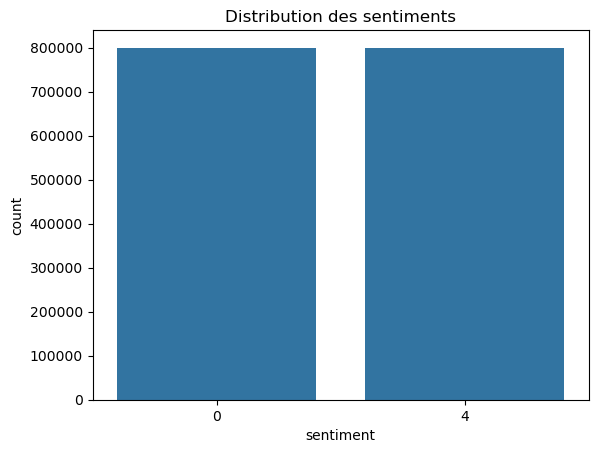

In [19]:
#@title 3.1 Distribution des classes


# Afficher la distribution des sentiments
sns.countplot(x='sentiment', data=df)
plt.title('Distribution des sentiments')
plt.show()

In [ ]:
#@title 3.2 Longueur des tweets

# Calculer la longueur des tweets
df['longueur_tweet'] = df["text"].apply(len)

# Afficher la distribution de la longueur des tweets
sns.histplot(df['longueur_tweet'], bins=50)
plt.title('Distribution de la longueur des tweets')
plt.xlabel('Longueur du tweet')
plt.ylabel('Nombre de tweets')
plt.show()

In [ ]:
#@title 3.3 Fréquence des mots

from collections import Counter

# Joindre tous les tweets nettoyés en une seule chaîne de caractères
all_words = ' '.join(df["text"].tolist()).split()

# Filtrer les stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word.lower() not in stop_words]

# Compter les occurrences de chaque mot
word_counts = Counter(filtered_words)

# Affichage des 20 mots les plus fréquents
print("20 mots les plus fréquents :")
print(word_counts.most_common(20))


20 mots les plus fréquents :
[("I'm", 99559), ('get', 76734), ('like', 73302), ('-', 67079), ('go', 62969), ('good', 59775), ('day', 55748), ('got', 53871), ('going', 53236), ('love', 50051), ('work', 45913), ('back', 44033), ('u', 43568), ('really', 42152), ('see', 41343), ('know', 41338), ('one', 41082), ('&amp;', 40131), ('time', 39570), ('want', 39218)]


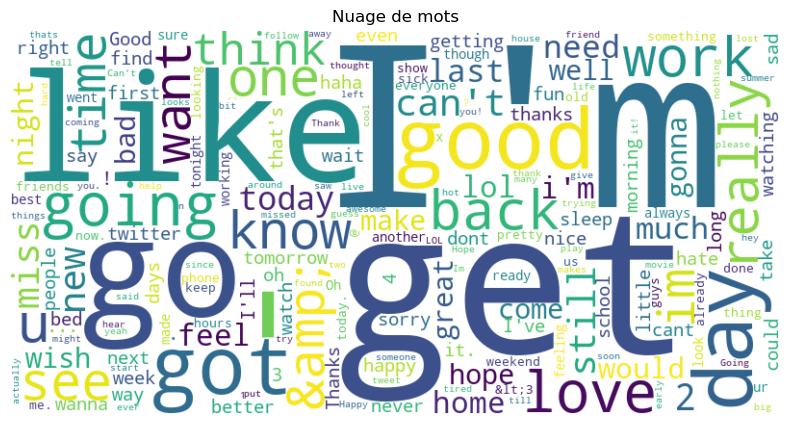

In [ ]:
#@title 3.4 Nuage de mots

from wordcloud import WordCloud

# Créer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots')
plt.show()

## 4. Conclusion

Dans ce notebook, nous avons exploré les données de tweets en effectuant une analyse descriptive et une analyse exploratoire. 

Nous avons notamment observé :

* La distribution des sentiments (classes équilibrées).
* La longueur des tweets (distribution asymétrique).
* La fréquence des mots (mots les plus fréquents).
* Un nuage de mots pour visualiser les termes importants.

Ces analyses nous permettent de mieux comprendre les données et de préparer les étapes de prétraitement et de modélisation.
